### 8η Εργαστηριακή Άσκηση 


#### Όνομα: Αλεξανδρόπουλος Σταμάτης

#### Αριθμός Μητρώου: 03117060

##### Παραδοτέα

##### Ερώτημα α

Δοκιμάστε να τρέξετε τον κώδικα με όλα τα spin αρχικά στο +1. 
Τρέξτε τον μερικές φορές. Αλλάζουν τα ποιοτικά χαρακτηριστικά 
της διαμόρφωσης που επιστρέφει ο αλγόριθμος;


*Λύση*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



def Ising(spins_init, Temp, nsteps=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
    
    return spins

Positive spins:  496
Negative spins:  528


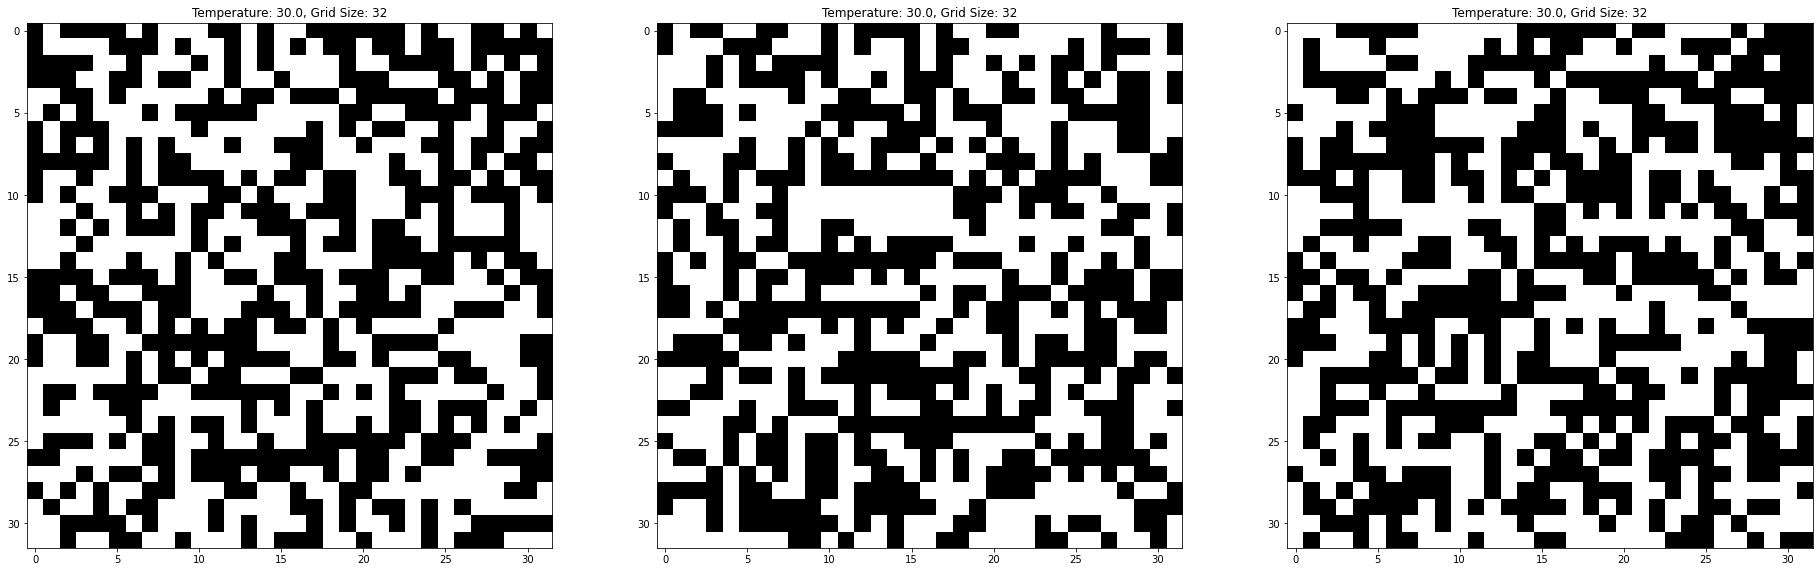

In [2]:
spins = Ising( np.ones( ( 32, 32 ) ), 30)
val_plus= 0
val_minus=0

for i in spins:
    for j in i:
        if j > 0:
            val_plus =val_plus+ 1
        else:
            val_minus =val_minus+ 1

print("Positive spins: ", val_plus)
print("Negative spins: ", val_minus)
T=30
spins1= Ising(np.ones((32,32)),T)
spins2= Ising(np.ones((32,32)),T)
spins3= Ising(np.ones((32,32)),T)

fig=plt.figure(figsize=(32, 32))
L=32
fig.add_subplot(1,3,1)
plt.imshow(spins1, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
plt.title("Temperature: %.1f, Grid Size: %d" % (T, L))
fig.add_subplot(1,3,2)
plt.imshow(spins2, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
plt.title("Temperature: %.1f, Grid Size: %d" % (T, L))
fig.add_subplot(1,3,3)
plt.imshow(spins3, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
plt.title("Temperature: %.1f, Grid Size: %d" % (T, L))

plt.show()


#### Σχολιασμός

Παρατηρούμε ότι τα ποιοτικά χαρακτηριστικά( πλήθος των θετικών και αρνητικών spins των κελιών) δεν αλλάζουν ιδιαίτερα για σταθερή θερμοκρασία και πλήθος βημάτων.

##### Ερώτημα β

β) Με όλα τα spin αρχικά τυχαία, αρχίστε τώρα να κατεβάζετε τη θερμοκρασία, θέτοντας διαδοχικά 
T = 30, 10, 5, 2, 1.5, 1., 0.5, 0.1, 0.01. Δείξτε για κάθε θερμοκρασία την εικόνα που πήρατε.

*Λύση*

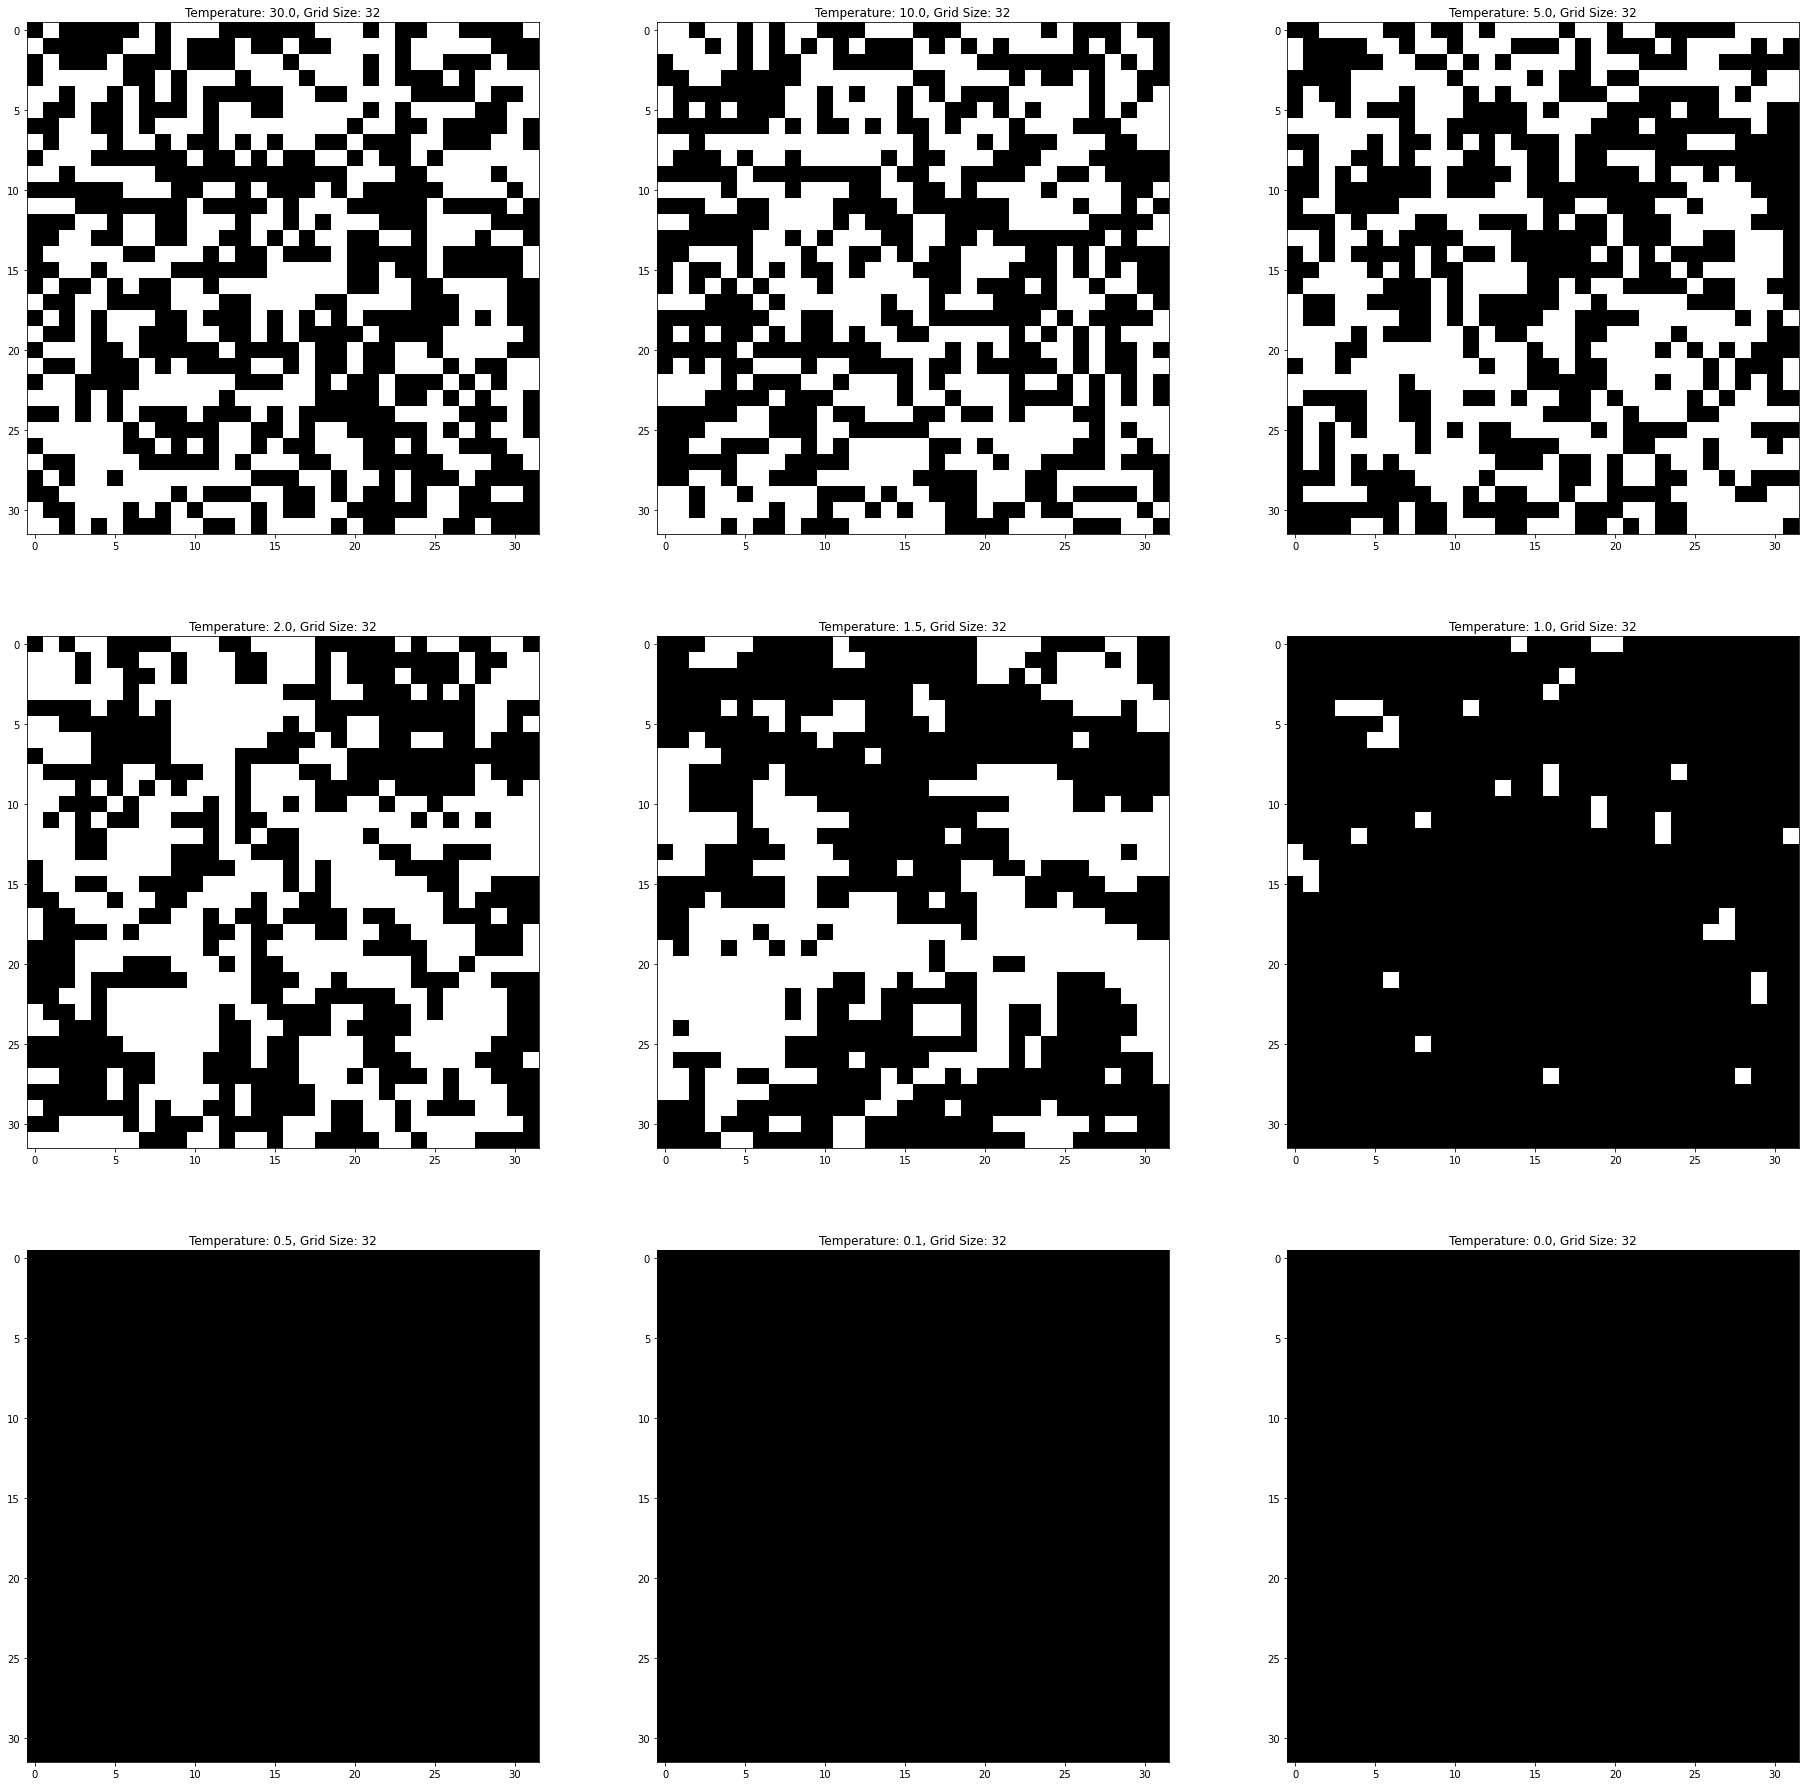

In [3]:
i = 1
L=32
fig=plt.figure(figsize=(32, 32))
means=[]
for T in [ 30, 10, 5, 2, 1.5, 1, 0.5, 0.1, 0.01 ]:
    spins = Ising( np.ones( ( 32, 32 ) ), T )
    means.append(np.mean(spins))
    fig.add_subplot(3, 3, i)
    plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.1f, Grid Size: %d" % (T, L))
    i += 1

plt.show()

##### Ερώτημα γ
 Εξετάστε πώς συμπεριφέρεται η $m(\sigma)$ για τις καταστάσεις $\sigma$ 
που δίνει ο αλγόριθμος καθώς κατεβάζετε τη θερμοκρασία, όπως στο ερώτημα (β).
Δείξτε μια γραφική παράσταση της $m(\sigma)$ ως προς τη θερμοκρασία (για τη διαμόρφωση $\sigma$ που προσομοιώσατε).


*Λύση* 

Η υλοποίηση της συνάρτησης υπολογισμού μαγνήτισης είναι η εξής :

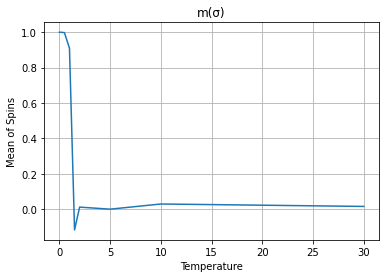

In [7]:
def m_fun(sigma):
    sum1 =0
    total=0
    for i in sigma:
        for j in i:
            sum1 += j
            total += 1
    return sum1 / total


means = []

for T in [ 30, 10, 5, 2, 1.5, 1, .5, .1, .01 ]:
    spins = Ising( np.ones( ( 32, 32 ) ), T )
    means.append( m_fun(spins) )

plt.plot([30., 10., 5., 2., 1.5, 1., 0.5, 0.1, 0.01],means)
plt.xlabel("Temperature")
plt.ylabel("Mean of Spins")
plt.title("m(σ)")
plt.grid()
plt.show()

#### Ερώτημα δ

Για τη θερμοκρασία `T = 0.1` αλλάξτε την τιμή της παραμέτρου nsteps. Πώς μοιάζουν τα ενδιάμεσα στάδια από τα οποία περνάει η αλυσίδα μέχρι να καταλήξουμε στην εικόνα που πήραμε για `nsteps = 800 × L × L`; Δείξτε τις εικόνες που πήρατε για 
`nsteps=10,20,50,100,200,400,800  × L × L`


*Λύση*

In [8]:
T=0.1
steps = [10,20,50,100,200,400,800]
list2=[]
length=len(steps)
for i in range(length): 
    list2.append(Ising(np.ones((32,32)), T,steps[i]*32*32))

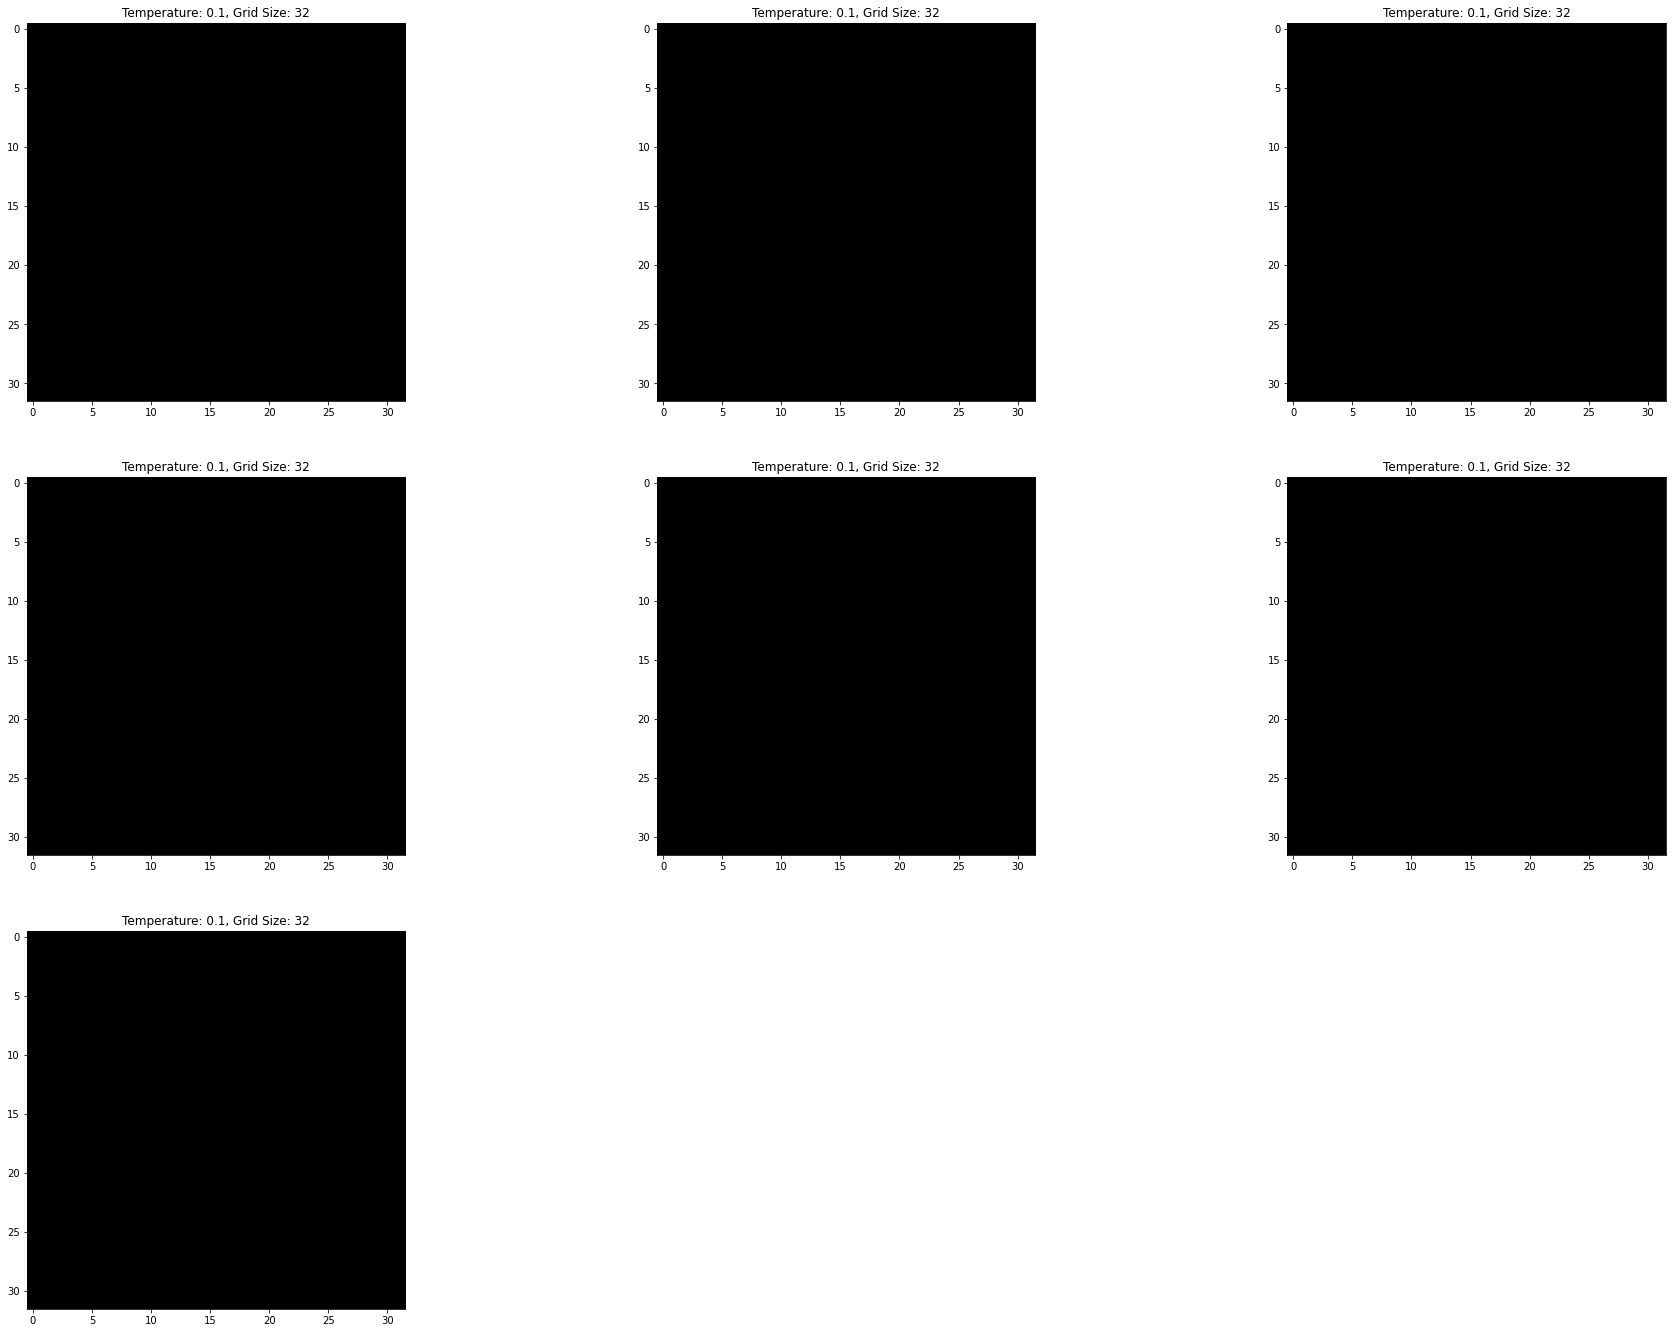

In [9]:
fig=plt.figure(figsize=(32, 32))
for i in range(length): 
    fig.add_subplot(4,3,i+1)
    plt.imshow(list2[i], cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: %.1f, Grid Size: %d" % (T, L))



H θερμοκρασία είναι πολύ χαμηλή και  βλέπουμε ότι τα ενδιάμεσα στάδια δεν διαφέρουν πολύ. Για να δούμε κάποια αισθητή διαφορά στην διαμόρφωση πρπεει να επαναλάβουμε την διαδικασία για πολλά βήματα. 